## Import Packages and Data

In [1]:
#import Matplotlib package
import matplotlib.pyplot as plt

#import Pandas package
import pandas as pd

#import numpy package
import numpy as np

%matplotlib inline

#import data as Data Frame
df_const = pd.read_csv('ConstructionTimeSeriesDataV2.csv')

Review Data and Plot the time series to determine which decomposition method to use.

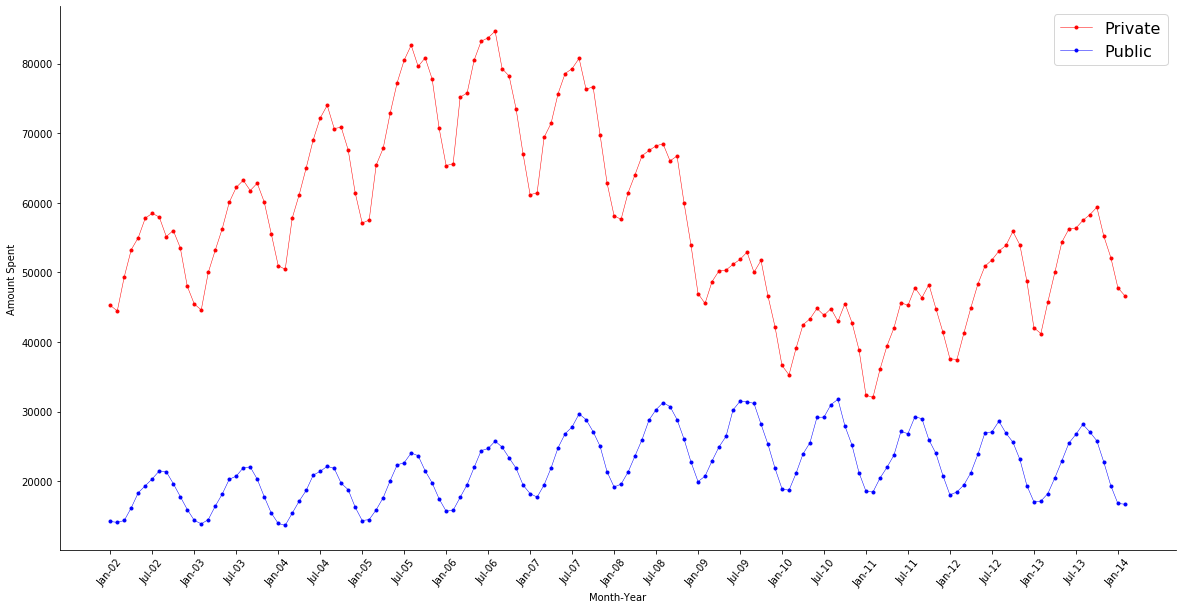

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375
...,...,...,...,...,...
141,142,Oct-13,85193,59370,25823
142,143,Nov-13,77931,55191,22741
143,144,Dec-13,71502,52132,19369
144,145,Jan-14,64661,47827,16834


In [2]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)

#set x and y values
x = df_const['Month-Year']
y1 = df_const['Private Construction']
y2 = df_const['Public Construction']

ax.plot(x,y1,color='red',linewidth=.5,marker='.', label='Private')
ax.plot(x,y2,color='blue',linewidth=.5,marker='.', label='Public')

ax.set_xticks (x[::6])
ax.set_xticklabels (x[::6],rotation = 50)

ax.legend(loc=1, fontsize = 16)
ax.set_xlabel('Month-Year')
ax.set_ylabel('Amount Spent')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

df_const

The data series has a nonlinear trend, for this time series decomposition I will use the model below:

S(𝑚)=𝑇(𝑚)+𝐶(𝑚)+𝜖(𝑚)

where

S(𝑚)  = Number of amount spent in Month  𝑚

𝑚  = the index of the month

𝑇(𝑚)  =  𝑇  represents the trend of the data which, in this case, could be nonlinear.  𝑇(𝑚)  is the trend value for Month 𝑚

𝐶(𝑚)  = Cyclicality demand component which plays an analogous role to seasonality,  𝑆(𝑞) , except that the pattern repeats after period whose duration might not be one year.

𝜖(𝑚)  is the portion of demand that we will not be able to fit with  𝑇(𝑚)  and  𝐶(𝑚) .

## Compute Moving Average (T) and sqErr for amount spent on Private and Public Construction

In [3]:
#calculate the Moving Average (T= trend) and sqErr for Private and Public Construction

#Create columns for Private Construction Moving Average and Square error, populate columns with NaN
df_const['Prvt_MovAvg'] = np.NaN
df_const['Prvt_sqErr'] = np.NaN

#Create columns for Public Construction Moving Average and Square error, populate columns with NaN
df_const['Pblc_MovAvg'] = np.NaN
df_const['Pblc_sqErr'] = np.NaN

# Chaging the DataFrame index to DatetimeIndex data type
df_const.index = pd.DatetimeIndex(freq='m', start=pd.Timestamp(year=2002, month=1, day=31), periods = len(df_const['Private Construction']))

#Set moving average window
window = 12
window = window - window % 2

# Compute the moving average of amount spent on Private Construction in the loop below using a window centered on the data point whose average is being computed
for i in range(int(window/2),df_const.shape[0]-int(window/2)):
    df_const.loc[df_const.index[i],'Prvt_MovAvg'] = (0.5*df_const.iloc[i - int(window/2)]['Private Construction'] + 
                                                df_const.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 
                                                0.5*df_const.iloc[i + int(window/2)]['Private Construction'])/float(window)

# Compute the moving average of amount spent on Public Construction in the loop below using a window centered on the data point whose average is being computed
for i in range(int(window/2),df_const.shape[0]-int(window/2)):
    df_const.loc[df_const.index[i],'Pblc_MovAvg'] = (0.5*df_const.iloc[i - int(window/2)]['Public Construction'] + 
                                                df_const.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 
                                                0.5*df_const.iloc[i + int(window/2)]['Public Construction'])/float(window)

#Compute the Square Error for amount spent on Private Construction    
df_const['Prvt_sqErr'] = (df_const['Private Construction'] - df_const['Prvt_MovAvg'])**2
    
#Compute the Square Error for amount spent on Public Construction    
df_const['Pblc_sqErr'] = (df_const['Public Construction'] - df_const['Pblc_MovAvg'])**2

#remove NaN rows
df_const.dropna(how='any',inplace=True)

print('Average Squared Error per Month for Private Construction: ',sum(df_const['Prvt_sqErr'])/len(df_const))
print('Average Squared Error per Month for Public Construction: ',sum(df_const['Pblc_sqErr'])/len(df_const))

df_const



C:\Users\danny\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  if sys.path[0] == '':


Average Squared Error per Month for Private Construction:  31701673.583670188
Average Squared Error per Month for Public Construction:  13046470.551357789


,Month,Month-Year,Total Construction,Private Construction,Public Construction,Prvt_MovAvg,Prvt_sqErr,Pblc_MovAvg,Pblc_sqErr
2002-07-31,7,Jul-02,78863,58494,20369,52878.250000,3.153665e+07,17793.208333,6.634703e+06
2002-08-31,8,Aug-02,79460,57953,21507,52892.625000,2.560740e+07,17791.291667,1.380649e+07
2002-09-30,9,Sep-02,76542,55157,21385,52923.666667,4.987778e+06,17787.833333,1.293961e+07
2002-10-31,10,Oct-02,75710,56023,19687,52945.000000,9.474084e+06,17802.291667,3.552126e+06
2002-11-30,11,Nov-02,71362,53552,17810,52994.541667,3.107598e+05,17803.750000,3.906250e+01
...,...,...,...,...,...,...,...,...,...
2013-04-30,136,Apr-13,70535,50022,20513,51844.583333,3.321810e+06,22647.708333,4.556980e+06
2013-05-31,137,May-13,77327,54369,22959,52041.708333,5.416287e+06,22638.708333,1.025868e+05
2013-06-30,138,Jun-13,81722,56228,25495,52235.083333,1.594338e+07,22620.625000,8.262032e+06
2013-07-31,139,Jul-13,83104,56354,26750,52616.291667,1.397046e+07,22609.500000,1.714374e+07


## Plot Moving Average for Private and Public Construction

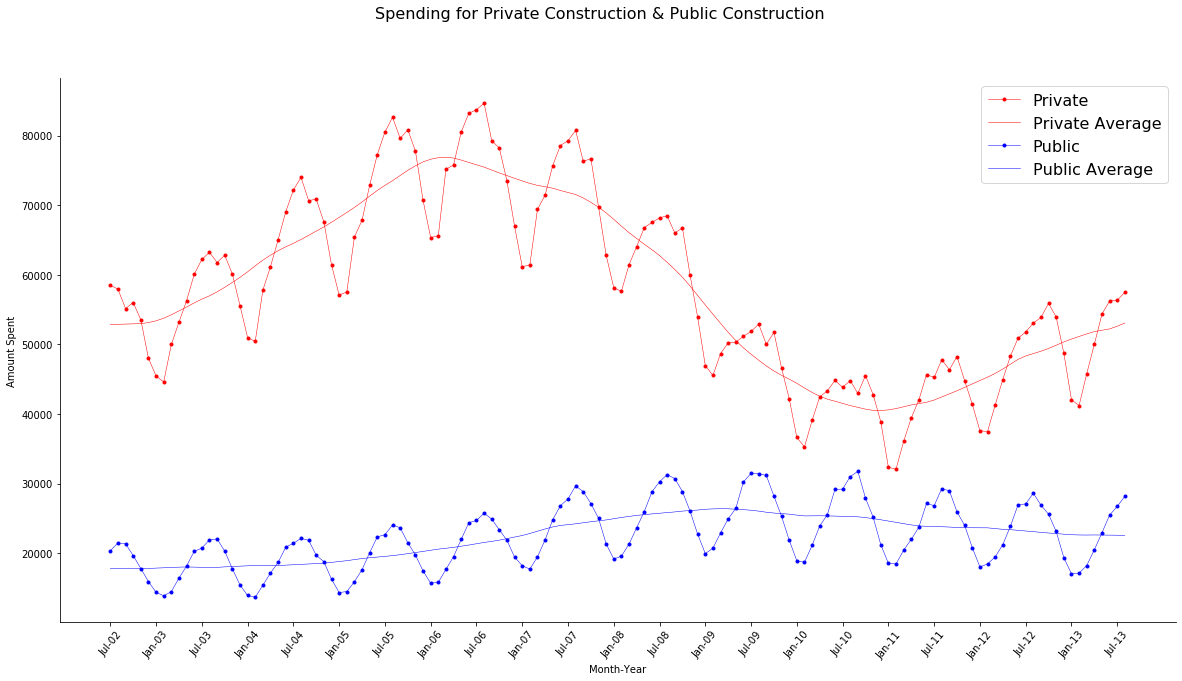

In [4]:
#timeseries with Moving average

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
fig.suptitle('Spending for Private Construction & Public Construction',fontsize = 16)

#set x and y values
x = df_const ['Month-Year']
y1 = df_const['Private Construction']
y2 = df_const['Public Construction']

#Private
ax.plot(x,y1,color='red',linewidth=.5,marker='.', label='Private')
ax.plot(x,df_const['Prvt_MovAvg'],color='red',linewidth=.5, label='Private Average') 

#Public
ax.plot(x,y2,color='blue',linewidth=.5,marker='.', label='Public')
ax.plot(x,df_const['Pblc_MovAvg'],color='blue',linewidth=.5, label='Public Average') 

ax.set_xticks (x[::6])
ax.set_xticklabels (x[::6],rotation = 50)

ax.legend(loc=1, fontsize = 16) 
ax.set_xlabel('Month-Year')
ax.set_ylabel('Amount Spent')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

## Compute R1 and R1 Error for Private Construction

C:\Users\danny\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


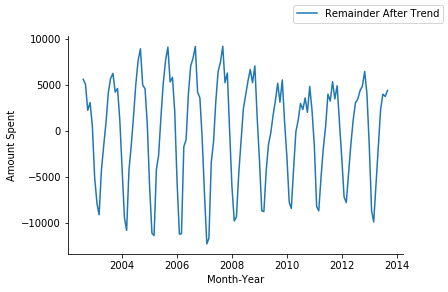

Average Residual:  30.595149253731616


In [5]:
#calculate the R1 and R1 Error for Private Construction
df_const['R1'] = df_const['Private Construction'] - df_const['Prvt_MovAvg']
df_const['R1Error'] = abs((df_const['Private Construction'] - df_const['R1'])/df_const['Private Construction'])
df_const.style.format({
    'Prvt_MovAvg': '{:.1f}'.format,
    'Prvt_sqErr': '{:,.1f}'.format,
    'Pblc_MovAvg': '{:.1f}'.format,
    'Pblc_sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

#plot R1 for Private Construction
fig,ax = plt.subplots()
ax.plot(df_const['R1'],label='Remainder After Trend')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Amount Spent')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

plt.show()

print('Average Residual: ', sum(df_const['R1'])/len(df_const))

#df_const

## Compute the Cyclicality (C) of the Private Construction Data

Review the max correlation of R1 to help determine the cyclicality period

period =  12      Maximum Correlation =  0.9718794492320808


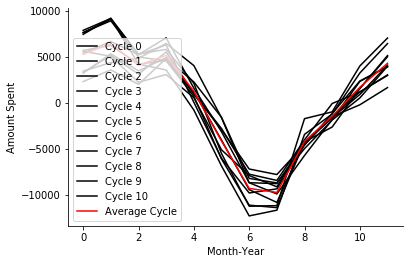

In [6]:
#Max Correlation calculation
maxCorr = 0.0
period = np.NaN
for i in range(1,13):
    corr = df_const['R1'].autocorr(lag=i)
    #print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

#calculate the Cyclic for the 10 years (cycles) using the Maximum Correlation Period  
period = 12
cycleLen = period
numCycles = int(len(df_const)/cycleLen + 0.5)
cycles = [df_const.iloc[range(i*period,min((i+1)*period,len(df_const)))]['R1'] for i in range(numCycles)]
ptsInCycles = [df_const.iloc[range(i,len(df_const['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

#Plot each Cycle with the Average Cycle
fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Amount Spent')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

Calculate the Cyclic values and plot it with R1 (Remainder after Trend) 

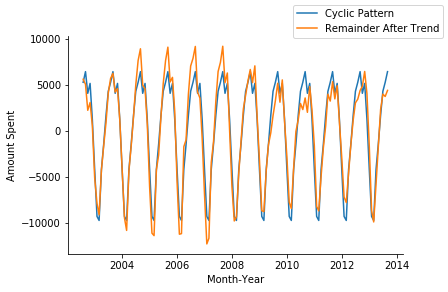

In [7]:
#calculate the Cyclic values (C)
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(df_const)/cycleLen + 0.5)
df_const['C'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(df_const)):
    df_const.loc[df_const.index[i], 'C'] = avg[i % cycleLen] # Write appropriate cyclicality value

#plot Cyclic (C) and R1    
fig,ax = plt.subplots()
ax.plot(df_const['C'],label='Cyclic Pattern')
ax.plot(df_const['R1'],label='Remainder After Trend')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Amount Spent')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

plt.show()

## Calculate R2 and R2Error (𝜖(𝑚)) for the Private Construction Spending

Subtract the Cyclic values (C) from R1 to determine R2

Average Error:  0.020585783569537188


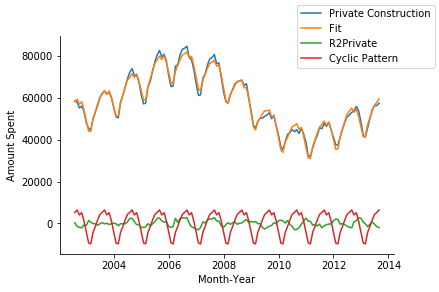

,Month,Month-Year,Total Construction,Private Construction,Public Construction,Prvt_MovAvg,Prvt_sqErr,Pblc_MovAvg,Pblc_sqErr,R1,R1Error,C,R2Private,R2ErrorPrivate,fit
2002-07-31,7,Jul-02,78863,58494,20369,52878.250000,3.153665e+07,17793.208333,6.634703e+06,5615.750000,0.903994,5281.409722,334.340278,0.005716,58159.659722
2002-08-31,8,Aug-02,79460,57953,21507,52892.625000,2.560740e+07,17791.291667,1.380649e+07,5060.375000,0.912681,6441.833333,-1381.458333,0.023838,59334.458333
2002-09-30,9,Sep-02,76542,55157,21385,52923.666667,4.987778e+06,17787.833333,1.293961e+07,2233.333333,0.959510,4081.571970,-1848.238636,0.033509,57005.238636
2002-10-31,10,Oct-02,75710,56023,19687,52945.000000,9.474084e+06,17802.291667,3.552126e+06,3078.000000,0.945058,5159.443182,-2081.443182,0.037153,58104.443182
2002-11-30,11,Nov-02,71362,53552,17810,52994.541667,3.107598e+05,17803.750000,3.906250e+01,557.458333,0.989590,1250.583333,-693.125000,0.012943,54245.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-30,136,Apr-13,70535,50022,20513,51844.583333,3.321810e+06,22647.708333,4.556980e+06,-1822.583333,1.036436,-1459.571970,-363.011364,0.007257,50385.011364
2013-05-31,137,May-13,77327,54369,22959,52041.708333,5.416287e+06,22638.708333,1.025868e+05,2327.291667,0.957195,1697.541667,629.750000,0.011583,53739.250000
2013-06-30,138,Jun-13,81722,56228,25495,52235.083333,1.594338e+07,22620.625000,8.262032e+06,3992.916667,0.928987,4304.223485,-311.306818,0.005537,56539.306818
2013-07-31,139,Jul-13,83104,56354,26750,52616.291667,1.397046e+07,22609.500000,1.714374e+07,3737.708333,0.933674,5281.409722,-1543.701389,0.027393,57897.701389


In [8]:
df_const['R2Private'] = df_const['R1'] - df_const['C']
df_const['R2ErrorPrivate'] = abs(df_const['R2Private']/df_const['Private Construction'])
df_const['fit'] = df_const['Prvt_MovAvg'] + df_const['C']

print('Average Error: ', sum(df_const['R2ErrorPrivate'])/len(df_const))

fig,ax = plt.subplots()
ax.plot(df_const['Private Construction'],label='Private Construction')
ax.plot(df_const['fit'], label = 'Fit')
ax.plot(df_const['R2Private'], label = 'R2Private')
ax.plot(df_const['C'],label='Cyclic Pattern')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Amount Spent')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
plt.show()

df_const

## Plot Final Decomposition Analysis for Private Construction Spending 

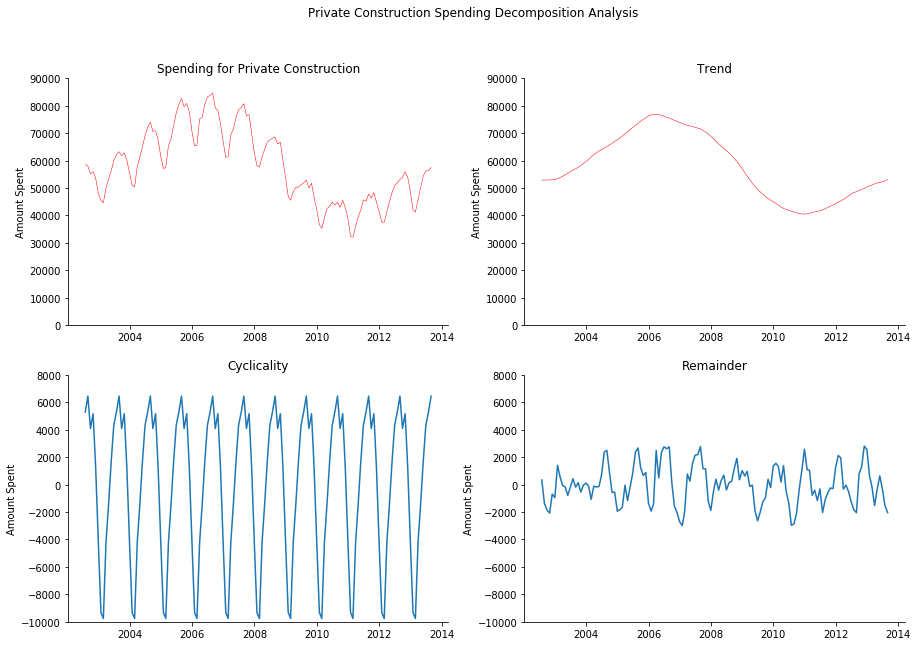

In [9]:
#final decomposition for Private Construction Spending

fig, ax = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)
fig.suptitle('Private Construction Spending Decomposition Analysis')


ax[0,0].set_title('Spending for Private Construction')
ax[0,0].plot(df_const['Private Construction'],color='red',linewidth=.5)
#ax[0,0].plot(df_const['fit'], label = 'Fit')
#ax[0,0].set_xlabel('Month-Year')
ax[0,0].set_ylabel('Amount Spent')
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].set_ylim(0,90000)
#ax[0,0].legend()

#Trend Private Average
ax[0,1].set_title('Trend')
ax[0,1].plot(df_const['Prvt_MovAvg'],color='red',linewidth=.5) 
#ax[0,1].set_xlabel('Month-Year')
ax[0,1].set_ylabel('Amount Spent')
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].set_ylim(0,90000)
#ax[0,1].legend()

#Cyclic Pattern
ax[1,0].set_title('Cyclicality')
ax[1,0].plot(df_const['C'])
#ax[1,0].set_xlabel('Month-Year')
ax[1,0].set_ylabel('Amount Spent')
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)
ax[1,0].set_ylim(-10000,8000)
#ax[1,0].legend()

#Remainder
ax[1,1].set_title('Remainder')
ax[1,1].plot(df_const['R2Private'])
#ax[1,1].set_xlabel('Month-Year')
ax[1,1].set_ylabel('Amount Spent')
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)
ax[1,1].set_ylim(-10000,8000)
#ax[1,1].legend()


plt.show()


